### 相关库导入

In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_row',100,'display.max_columns',1000,'display.max_colwidth',1000,'display.width',1000)

D:\Tool\Anaconda\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


### 所用到的变量

In [2]:
city = ['fuyang','gongshu','linan','linpingqu','qiantangqu','shangcheng','xiaoshan','xihu','yuhang']
filterColumn = ['小区名称','区域位置','总价','单价','关注度','所在楼层','建筑面积','户型结构','建筑类型','房屋户型','房屋朝向','建筑结构','装修情况','配备电梯','交易权属','房屋用途','房屋年限','产权所属','上次交易']

### 读取数据并连接

In [3]:
result = pd.read_csv('../data/binjiang杭州二手房.csv',encoding='GB18030',index_col=0)
for i in city:
    data = pd.read_csv('../data/{}杭州二手房.csv'.format(i),encoding='GB18030',index_col=0)
    result = pd.concat([result,data],ignore_index=True)
result

,小区名称,区域位置,经度,纬度,总价,单价,看房时间,链家编号,关注度,房屋户型,所在楼层,建筑面积,户型结构,套内面积,建筑类型,房屋朝向,建筑结构,装修情况,梯户比例,配备电梯,挂牌时间,交易权属,上次交易,房屋用途,房屋年限,产权所属,抵押信息,房本备件,房源核验统一编码,查询房管备案记录,核心卖点,小区介绍,周边配套,税费解析,用水类型,用电类型,燃气价格,户型介绍,适宜人群,装修描述,售房详情,交通出行,别墅类型,权属抵押
0,['欣盛东方郡西区'],滨江-滨江区政府,120.218825,30.203884,930.0,69053,提前预约随时可看,103117810968,4,3室2厅1厨2卫,中楼层 (共18层),134.68㎡,平层,109.14㎡,板塔结合,南 北,钢混结构,精装,四梯两户,有,2021-10-26,商品房,2011-07-18,普通住宅,满五年,共有,\n 无抵押\n,已上传房本照片,211024MV287538,\n 东边套，户型南北通双阳台，自住精装，满五年，中间楼层\n,\n 东方郡西区建成于2010年，2011年交付，小区共19栋，住户1563户，小区地下车位990个，加上地上机动车位可达到1：1，小区是欣盛开发，龙湖物业，物业费2.65包含能耗\n,\n 小区位于区政府板块，配套完善，距离小区500米是中赢国际综合体，南面有200米中赢康康谷综合体，1000米处有星光大道步行街，2000米内有市武警医院，大型商场百货大楼，各种服装店，多家银行等，吃喝玩乐一体化。距离钱塘江观景平台不到2公里\n,\n 业主一手买进，目前早已满五年，名下非此一套。所以税费是：契税（首套1.5%，二套2%）+个税1%。\n,\n 小区距离地铁一号线约500米（高德地图），公交路线有175路，300路，195路，出行方便！\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,['铂金时代公寓'],滨江-滨江区政府,120.223773,30.201048,765.0,55423,下班后可看,103117801479,7,3室2厅1厨2卫,低楼层 (共30层),138.03㎡,平层,105.08㎡,板塔结合,南 北,砖混结构,精装,三梯三户,有,2021-10-26,商品房,2012-05-04,普通住宅,满五年,共有,\n 有抵押 业主自还\n,已上传房本照片,211026HO422693,\n 此房满五年 自住精装修 有车位 可拎包入住 \n,\n 本小区09年建成，位于滨江区政府板块，东依江陵路，西靠春晓路，南临滨兴路，北至江汉路，地铁1号线滨和站，与江南实验隔路相望。由8幢高层、小高层组成。环境优美。西边是康康谷，吃喝玩乐健身各种休闲娱乐一体\n,\n 公交：K195路（滨河路站）438米、k300路（春晓路滨河路口）573米、B支6（江汉路江晖路口）472米、K96（江汉东路站）146米 地铁：离滨和路站575米(1号线)、江陵路站1.6公里(1号线)\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,['星耀城'],滨江-滨江区政府,120.221367,30.219193,225.0,34611,提前预约随时可看,103108527621,104,3室1厅1厨2卫,低楼层 (共20层),65.01㎡,暂无数据,44.95㎡,板塔结合,西南,钢混结构,精装,四梯二十四户,有,2020-04-12,商品房,2015-04-02,商住两用,满五年,共有,\n 无抵押\n,已上传房本照片,200415534774,\n 1号线地铁精装修LOFT户型高档公寓 带阳台 交通便利 生活齐全\n,\n 2014年开发商统一精装修，可直接拎包入住，客厅挑空，带阳台自住舒适。\n,NaN,NaN,NaN,商水,商电,3.1元/m3,\n 本房地理位置优越，高品质，开发商精装，适合年轻上班或者独立自住职业人士\n,\n 地铁1号线和6号线江陵站，比邻江南大道，过三桥、四桥和望江隧道十分方便，萧山国际机场也可机场快速直达。\n,NaN,NaN,NaN,NaN,NaN
3,['中赢康康谷'],滨江-滨江区政府,120.220640,30.202140,148.0,31835,提前预约随时可看,103117403346,18,2室2厅1厨2卫,低楼层 (共18层),46.49㎡,暂无数据,暂无数据,板楼,南,钢混结构,精装,两梯三十一户,有,2021-09-28,商品房,2018-12-30,商住两用,满两年,共有,\n 无抵押\n,已上传房本照片,210928XQ417249,\n loft结构，民用电，带阳台，精装修，交通购物便利，实际使用.\n,\n 小区楼下购物方便，夜市生活丰富，另外小区北面有星光大道综合商体，星耀城综合体和滨江龙湖天街商综合体，生活配套齐全；北面1.5公里是滨江区的武警医院，另外还有浙二医院配套\n,NaN,\n \n功能齐全，既节省了资金，也可以保证住户的生活质量，配套设施完善，客户拎包即可入住，十分方便。\n,NaN,民水,民电,3.1元/m3,NaN,NaN,\n \n小区附 近500米为滨和路地铁口，出行便利，另外门口就是公交车站\n,NaN,NaN,NaN,NaN
4,['玲珑府'],滨江-西兴,120.232076,30.189648,130.0,26461,提前预约随时可看,103117598758,11,2室1厅1厨2卫,中楼层 (共21层),49.13㎡,暂无数据,暂无数据,板塔结合,南,钢混结构,精装,三梯十九户,有,2021-10-12,商品房,2018-05-16,商住两用,满两年,非共有,\n 有抵押 34万元 招商银行 业主自还\n,已上传房本照片,181112164018,\n 龙湖天街旁 地铁200米 层高4.8米两层LOFT 业主诚心卖\n,\n 小区为2015年建成的小区，开发商为杭州众联置业有限公司打造的，总建筑面积约16万平方米，北区为70年产权住宅区，南区为综合多元的配套区，精装SOHO公馆、时尚广场等多种产品类型步行约500米即可到达地铁一号线五号线滨康站\n,\n 联华，西兴农贸市场 银行：建设银行 杭州银行 杭州联合银行 农业银行 邮政银行 交通：1号线西兴地铁站和滨康地铁口 医疗：武警医院 滨江医院 浙江儿童医院。\n\n\n,\n 步行约500米即可到达地铁一号线滨康地铁口，公交:300路(城站火车站-西兴路滨康路口-杭州火车南站，下车即是)、301路(武林小广场-滨康路东-杭州火车南站)、315路(望江东路-滨康路东-萧绍路)、368路(滨盛公交站-滨康路东-衙前公交站)，出行方便。\n\n\n,NaN,商水,民电,3.1元/m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29022,['良渚文化村七贤郡'],余杭-良渚,120.007622,30.353357,280.0,31743,提前预约随时可看,103116072249,1,3室2厅1厨1卫,高楼层 (共9层),88.21㎡,平层,71.3㎡,板楼,南 北,钢混结构,精装,一梯四户,有,2021-07-12,商品房,2015-09-07,普通住宅,满五年,非共有,\n 有抵押 40万元 汇丰银行 业主自还\n,已上传房本照片,210714DD095713,\n 满五 全明户型 位置安静 业主偶尔自住 保养佳\n,\n 七贤郡融合万科三十年住宅性能实践成果，洞察空间的生活需求，户户大面宽短进深，全明通透，通风采光更佳；主卧、次卧、书房与部分卫生间设置飘窗，附加价值高，视野开阔。精心设计的三房，三开间朝南，三飘窗设计，U型厨房布局\n,\n 购物：永旺梦乐城、良渚食街、知味观味轩、联华购物、喜士多购物； 酒店：良渚君澜度假酒店 ；银行：农业银行、中国银行、工商银行 ；医院：浙一医院 ；文化：良渚博物院、大雄寺、美丽洲堂教堂；公园：矿坑公园、美丽洲公园、白鹭公园\n,\n 多重道路交通体系日益趋向完善。地铁2号线已开通。公交：K372路公交车（ 和睦新村~良渚文化村）、478路（ 余杭东门头~良渚文化村）、389（七贤郡~都市水乡）\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29023,['西城时代家园'],余杭-未来科技城,119.958771,30.271248,325.0,35342,提前预约随时可看,103114913580,13,3室2厅1厨1卫,中楼层 (共11层),91.96㎡,平层,暂无数据,板楼,南,钢混结构,简装,一梯两户,有,2021-05-08,商品房,2017-12-13,普通住宅,满两年,非共有,\n 有抵押\n,已上传房本照片,10509WL174114,\n 房子小区位置好 楼层高视野开阔 户型方正 万达广场 等...\n,\n 房东需要置换 诚心出售 目前租客在住到8月份 诚心价格可谈\n,NaN,\n 地铁5号线金星站 小区门口311 公交站 共享单车等......

### 数据预处理

In [4]:
# 截取字段生成新字段
data = result[filterColumn]
# 提取数字信息
def get_floor(s):
    # 使用正则表达式查找所有数字
    numbers = re.findall(r'\d+', s)
    # 如果找到了数字，则返回第一个找到的数字（假设每个字符串只有一个数字）
    # 如果需要处理多个数字，可以根据需要修改这里的逻辑
    if numbers:
        return numbers[0]  # 转换为整数
    else:
        return None  # 如果没有找到数字，返回None或其他默认值
def house_age(s):
    if s == '暂无数据':
        return 5
    else:
        createYear = int(str(s)[0:4])
        return 2024-createYear
def get_bedroom(s):
    numbers = re.findall(r'\d+',str(s))
    if numbers:
        return numbers[0]
    else:
        return None
def get_diningroom(s):
    numbers = re.findall(r'\d+',str(s))
    if numbers:
        return numbers[1]
    else:
        return None
def get_kitchen(s):
    numbers = re.findall(r'\d+',str(s))
    if numbers:
        return numbers[2]
    else:
        return None
def get_toilet(s):
    numbers = re.findall(r'\d+',str(s))
    if numbers:
        return numbers[3]
    else:
        return None

In [5]:
data['小区名称']  = data['小区名称'].str[2:-2]
data[['城市','街道']] = data['区域位置'].str.split('-',expand=True)
data['建筑面积'] = data['建筑面积'].str[:-1]
data['所在楼层'] = data['所在楼层'].apply(get_floor)
data['房屋年限'] = data['上次交易'].apply(house_age)
data['卧室数'] = data['房屋户型'].apply(get_bedroom)
data['客餐厅数'] = data['房屋户型'].apply(get_diningroom)
data['厨房数'] = data['房屋户型'].apply(get_kitchen)
data['卫生间数'] = data['房屋户型'].apply(get_toilet)
# 剔除不必要的列
data.drop(columns=['区域位置','房屋户型','上次交易','街道'],inplace=True)

In [6]:
# 处理缺失值
data['户型结构'].fillna(data['户型结构'].mode()[0],inplace=True)
data['建筑类型'].fillna(data['建筑类型'].mode()[0],inplace=True)
data['配备电梯'].fillna(data['配备电梯'].mode()[0],inplace=True)
data['装修情况'].fillna(data['装修情况'].mode()[0],inplace=True)
data['建筑结构'].fillna(data['建筑类型'].mode()[0],inplace=True)
data.dropna(inplace=True)
mode = data['户型结构'].mode()[0]
data['户型结构'].replace('暂无数据',mode,inplace=True)
mode = data['建筑类型'].mode()[0]
data['建筑类型'].replace('暂无数据',mode,inplace=True)
mode = data['配备电梯'].mode()[0]
data['配备电梯'].replace('暂无数据',mode,inplace=True)
mode = data['建筑结构'].mode()[0]
data['建筑结构'].replace('未知结构',mode,inplace=True)

In [7]:
# 数据类型转换
data['所在楼层'] = data['所在楼层'].astype(int)
data['建筑面积'] = data['建筑面积'].astype(float)
data['卧室数'] = data['卧室数'].astype(int)
data['客餐厅数'] = data['客餐厅数'].astype(int)
data['厨房数'] = data['厨房数'].astype(int)
data['卫生间数'] = data['卫生间数'].astype(int)

In [8]:
data

,小区名称,总价,单价,关注度,所在楼层,建筑面积,户型结构,建筑类型,房屋朝向,建筑结构,装修情况,配备电梯,交易权属,房屋用途,房屋年限,产权所属,城市,卧室数,客餐厅数,厨房数,卫生间数
0,欣盛东方郡西区,930.0,69053,4,18,134.68,平层,板塔结合,南 北,钢混结构,精装,有,商品房,普通住宅,13,共有,滨江,3,2,1,2
1,铂金时代公寓,765.0,55423,7,30,138.03,平层,板塔结合,南 北,砖混结构,精装,有,商品房,普通住宅,12,共有,滨江,3,2,1,2
2,星耀城,225.0,34611,104,20,65.01,平层,板塔结合,西南,钢混结构,精装,有,商品房,商住两用,9,共有,滨江,3,1,1,2
3,中赢康康谷,148.0,31835,18,18,46.49,平层,板楼,南,钢混结构,精装,有,商品房,商住两用,6,共有,滨江,2,2,1,2
4,玲珑府,130.0,26461,11,21,49.13,平层,板塔结合,南,钢混结构,精装,有,商品房,商住两用,6,非共有,滨江,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29022,良渚文化村七贤郡,280.0,31743,1,9,88.21,平层,板楼,南 北,钢混结构,精装,有,商品房,普通住宅,9,非共有,余杭,3,2,1,1
29023,西城时代家园,325.0,35342,13,11,91.96,平层,板楼,南,钢混结构,简装,有,商品房,普通住宅,7,非共有,余杭,3,2,1,1
29024,众安学君里,295.0,32859,22,24,89.78,平层,板塔结合,南 北,钢混结构,简装,有,商品房,普通住宅,5,共有,余杭,3,2,1,1
29025,北秀蓝湾花苑,320.0,25211,10,11,126.93,平层,板楼,南 北,钢混结构,精装,有,商品房,普通住宅,8,共有,余杭,3,2,1,2


In [9]:
areaName = list(data['城市'].value_counts().index)
areaCountList = list(data['城市'].value_counts())

<h5>杭州市二手房单价直方图</h5>

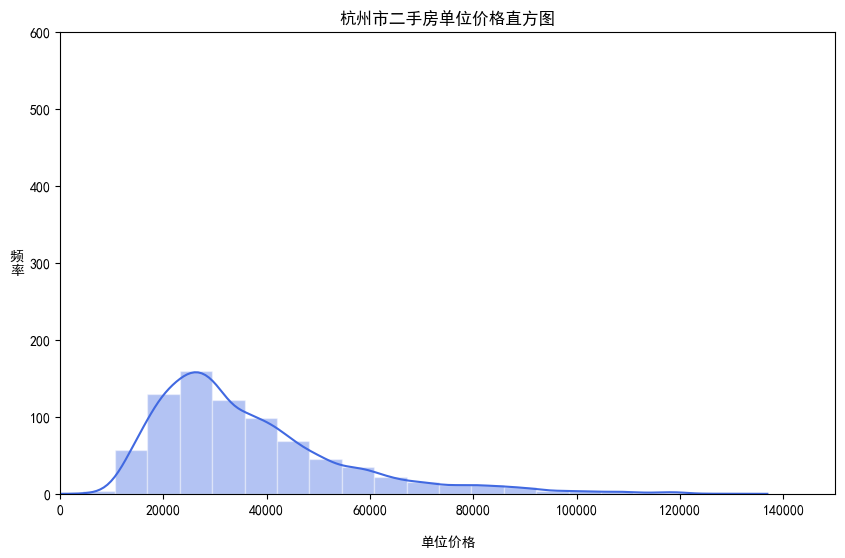

In [11]:
plt.figure(figsize=(10,6))
plt.title("杭州市二手房单位价格直方图")
sns.distplot(data['单价'], color="royalblue",bins=20, kde=True, hist_kws={"edgecolor":"w"})
plt.xlabel("\n单位价格")
plt.ylabel("频\n率", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
yticks_list = ['0', '100', '200', '300', '400', '500', '600']
plt.yticks(np.arange(0.0, 0.00014, 0.00002), yticks_list)
plt.xlim(0,150000)
plt.show()

<h5>杭州各城市房价直方图</h5>

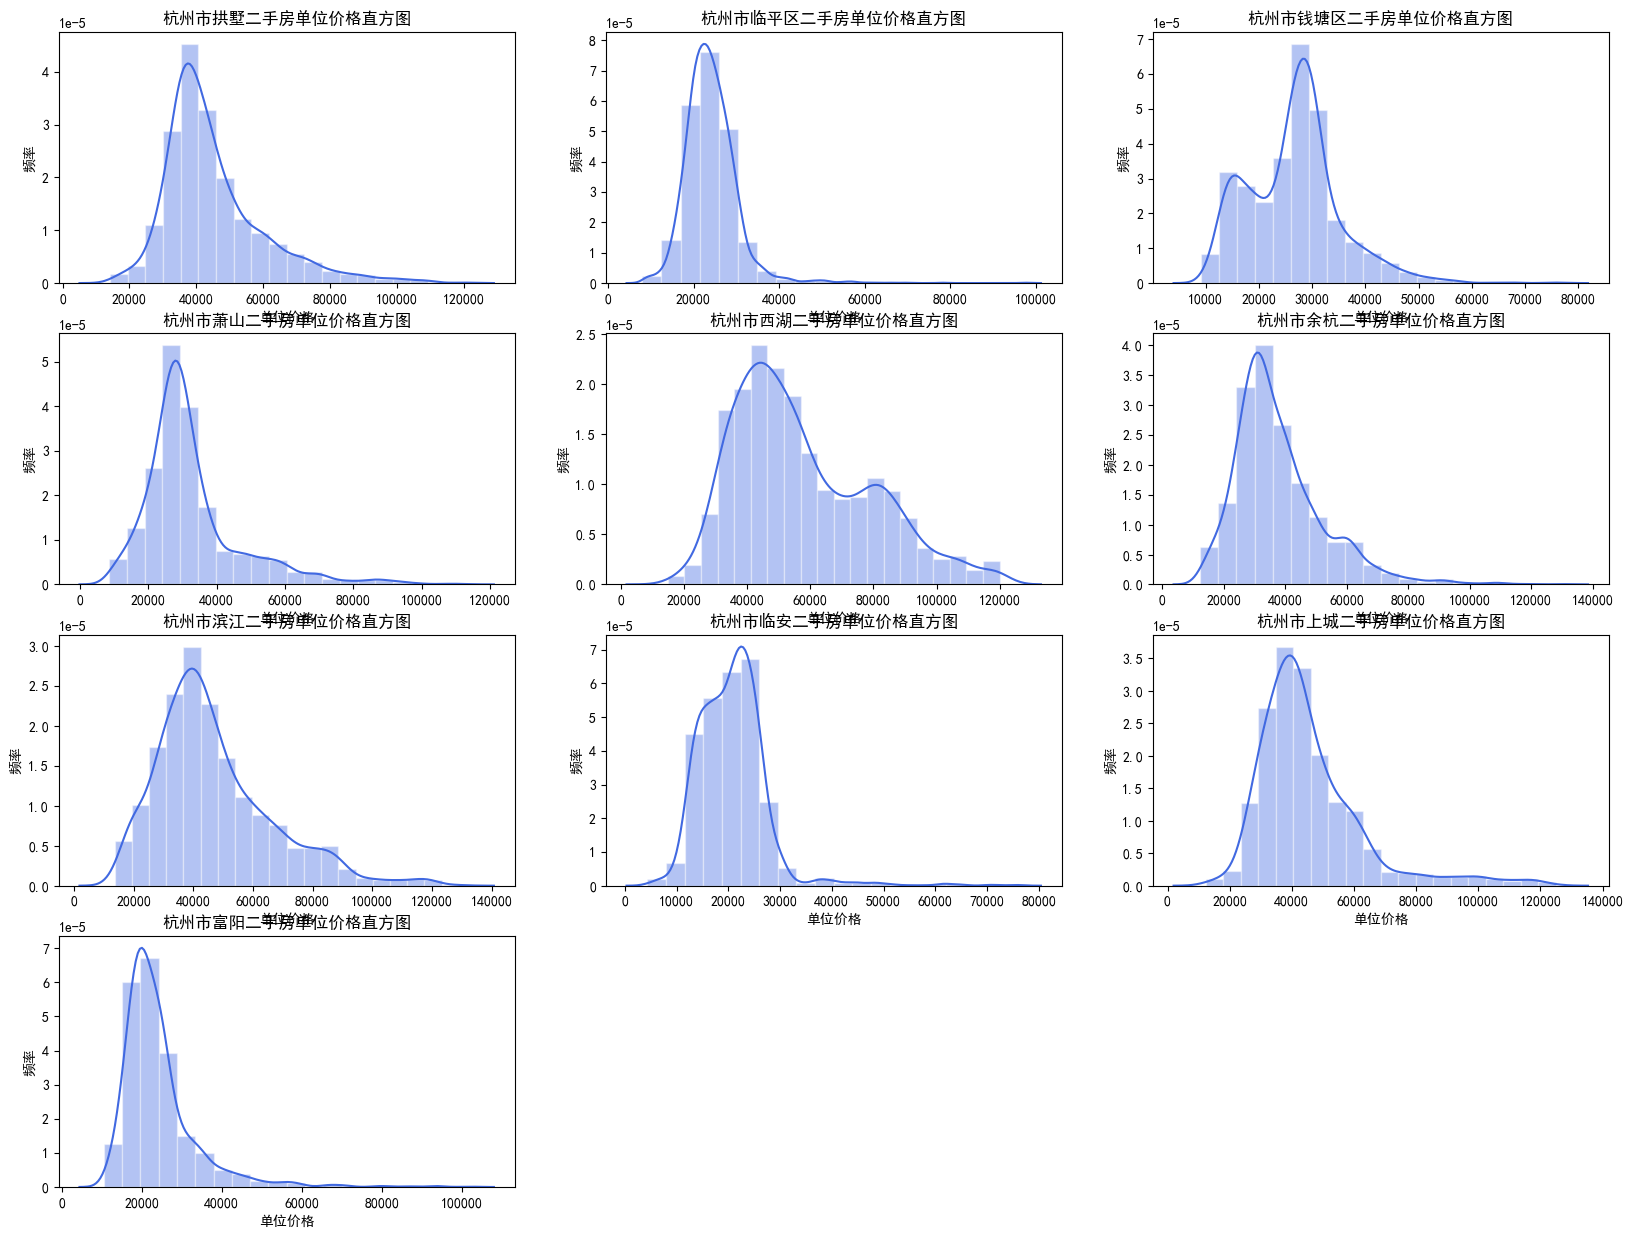

In [12]:
# 杭州各城市房屋单价直方图
plt.figure(figsize=(20,15))
for i in range(len(areaName)):
    cur_data = data[ data['城市'] == areaName[i] ]
    plt.subplot(4,3,i+1)
    plt.title("杭州市" + areaName[i] + "二手房单位价格直方图")
    sns.distplot(cur_data['单价'], color="royalblue",bins=20, kde=True, hist_kws={"edgecolor":"w"})
    plt.xlabel("单位价格")
    plt.ylabel("频率")
plt.show()

<h5>杭州各城市房屋总价直方图</h5>

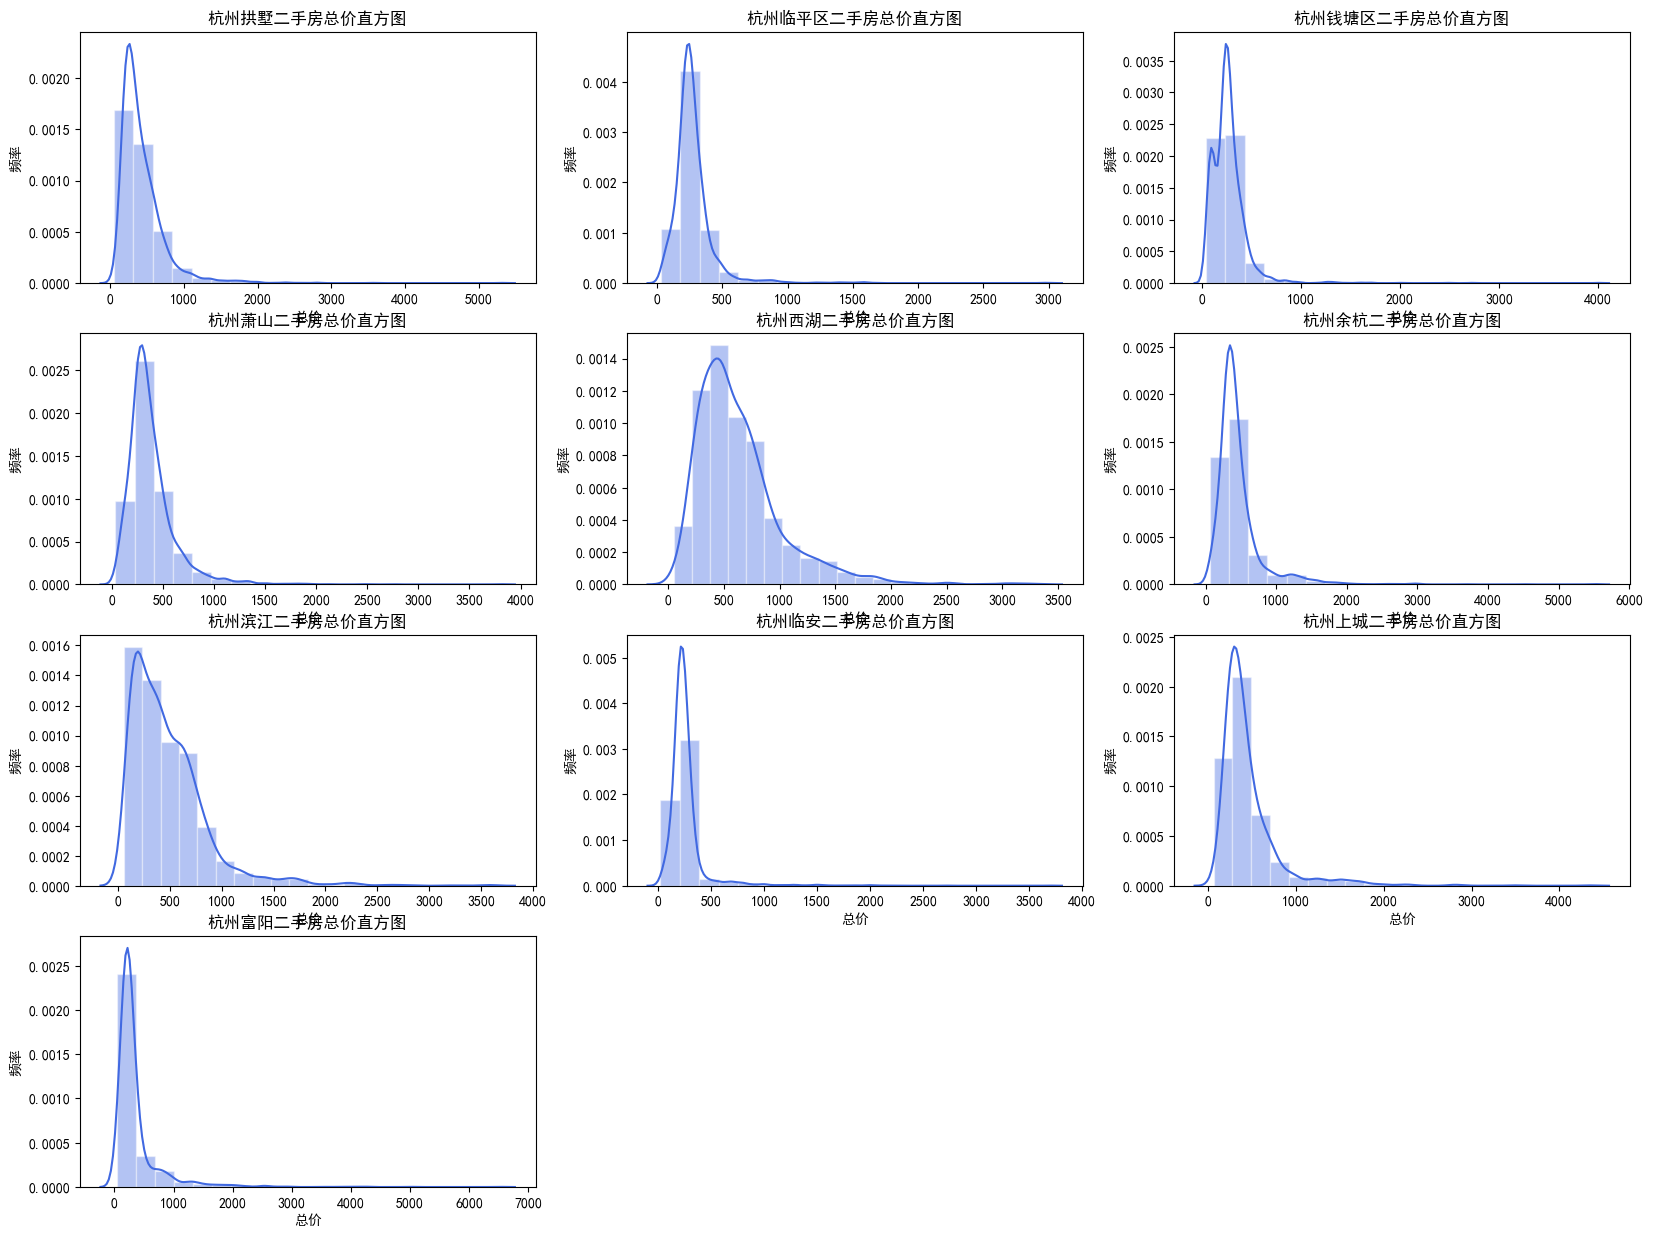

In [13]:
# 杭州各城市房屋总价直方图
plt.figure(figsize=(20,15))
for i in range(len(areaName)):
    cur_data = data[ data['城市'] == areaName[i] ]
    plt.subplot(4,3,i+1)
    plt.title("杭州" + areaName[i] + "二手房总价直方图")
    sns.distplot(cur_data['总价'], color="royalblue",bins=20, kde=True, hist_kws={"edgecolor":"w"})
    plt.xlabel("总价")
    plt.ylabel("频率")
plt.show()

<h5>杭州二手房建筑面积直方图</h5>

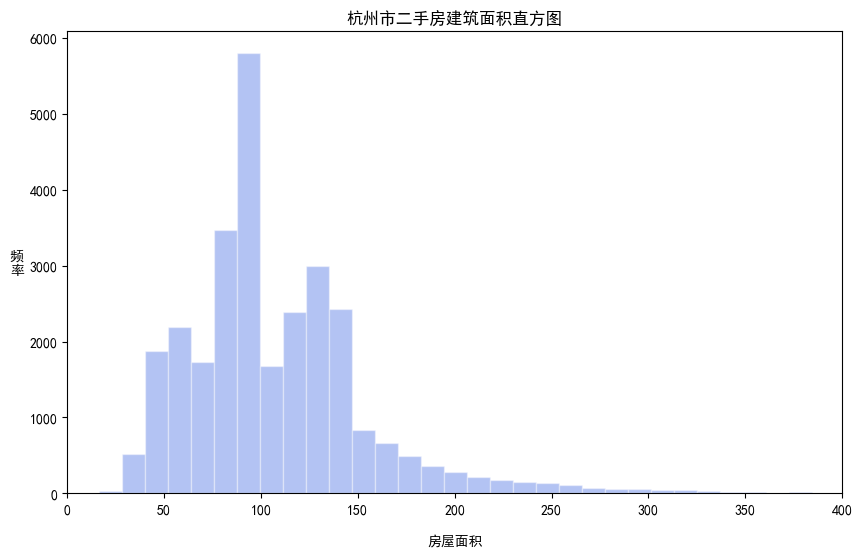

In [14]:
# 杭州市二手房建筑面积直方图
plt.figure(figsize=(10,6))
plt.title("杭州市二手房建筑面积直方图")
sns.distplot(data['建筑面积'], color="royalblue",bins=200, kde=False, hist_kws={"edgecolor":"w"})
plt.xlabel("\n房屋面积")
plt.ylabel("频\n率", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
plt.xlim(0,400)
plt.show()

<h5>杭州二手房面积-单价散点图</h5>

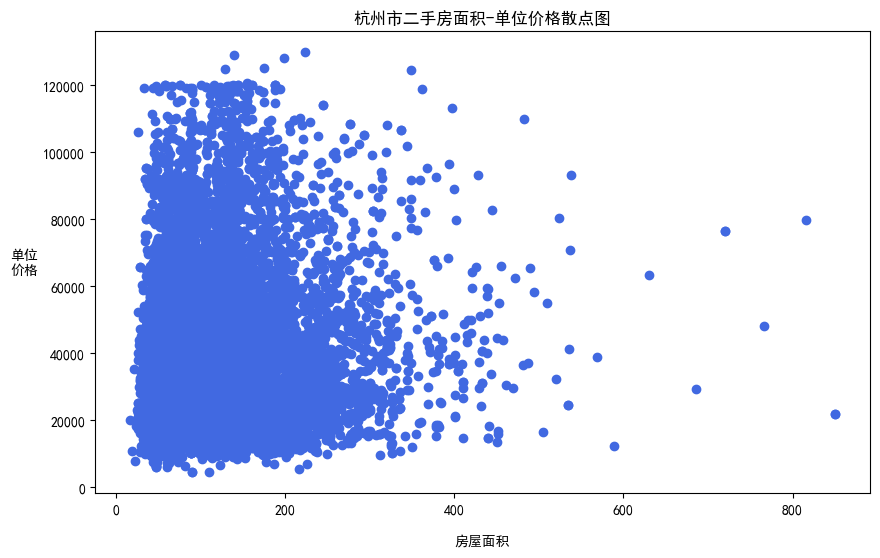

In [15]:
data.drop(data[data['建筑面积'] == 2391.55].index, inplace=True)
plt.figure(figsize=(10,6))
plt.title("杭州市二手房面积-单位价格散点图")
plt.scatter(data['建筑面积'], data['单价'],color="royalblue")
plt.xlabel("\n房屋面积")
plt.ylabel("单位\n价格", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
plt.show()

<h5>杭州市二手房面积-总价散点图</h5>

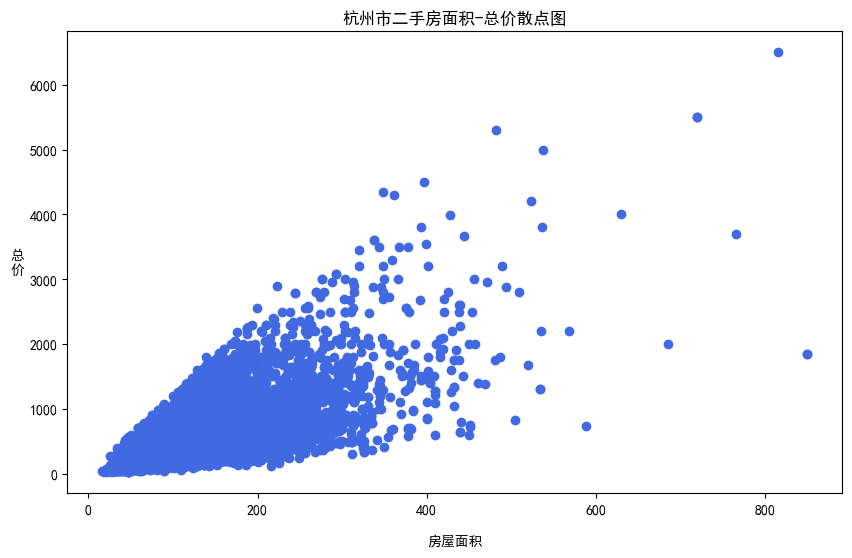

In [16]:
plt.figure(figsize=(10,6))
plt.title("杭州市二手房面积-总价散点图")
plt.scatter(data['建筑面积'], data['总价'],color="royalblue")
plt.xlabel("\n房屋面积")
plt.ylabel("总\n价", rotation = 'horizontal', verticalalignment = 'center', horizontalalignment = 'right')
plt.show()

<h5>杭州二手房卧室数饼图</h5>

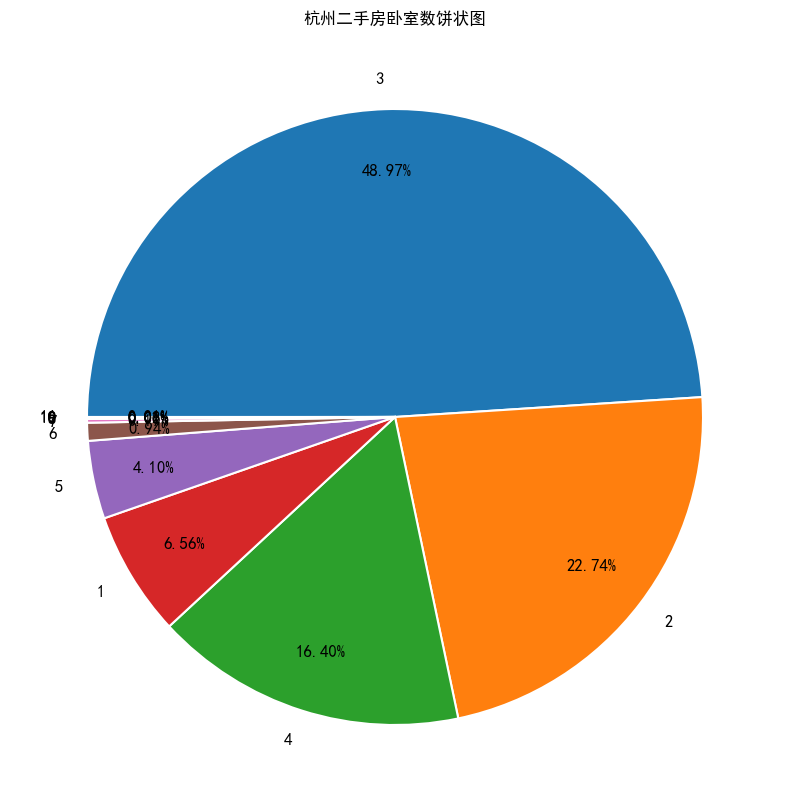

In [21]:
plt.figure(figsize=(12,10))
plt.title("杭州二手房卧室数饼状图")
louceng2 = data['卧室数'].value_counts()
plt.pie(louceng2, labels = louceng2.index, autopct='%.2f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.1, # 设置教育水平标签与圆心的距离
        startangle = 180, # 设置饼图的初始角度
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'w'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'black'}, # 设置文本标签的属性值
       )
plt.show()

<h5>杭州二手房客餐厅数饼状图</h5>

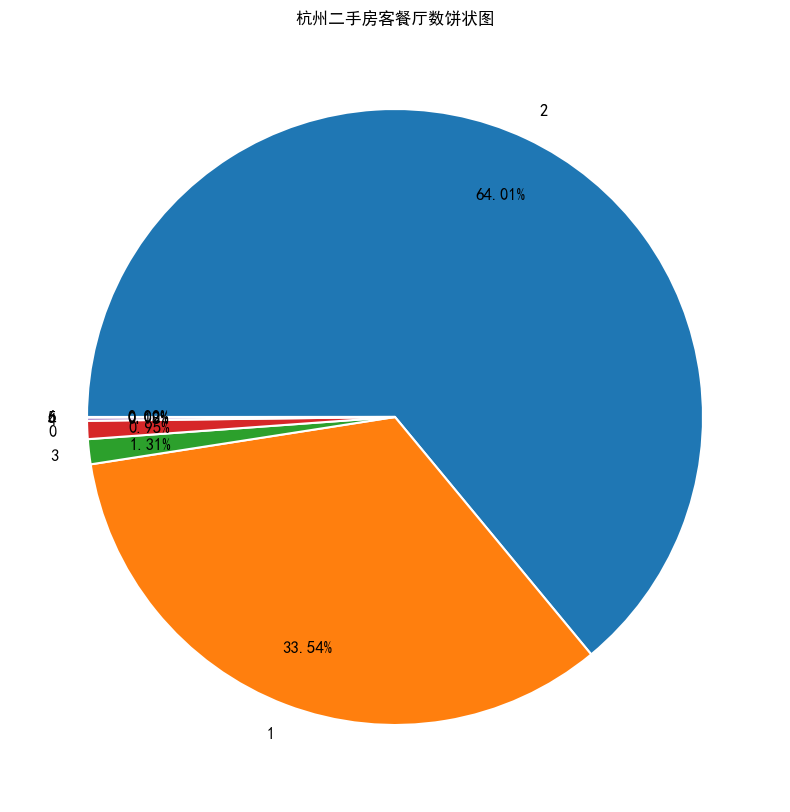

In [22]:
plt.figure(figsize=(12,10))
plt.title("杭州二手房客餐厅数饼状图")
louceng2 = data['客餐厅数'].value_counts()
plt.pie(louceng2, labels = louceng2.index, autopct='%.2f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.1, # 设置教育水平标签与圆心的距离
        startangle = 180, # 设置饼图的初始角度
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'w'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'black'}, # 设置文本标签的属性值
       )
plt.show()

<h5>杭州二手厨房数饼状图</h5>

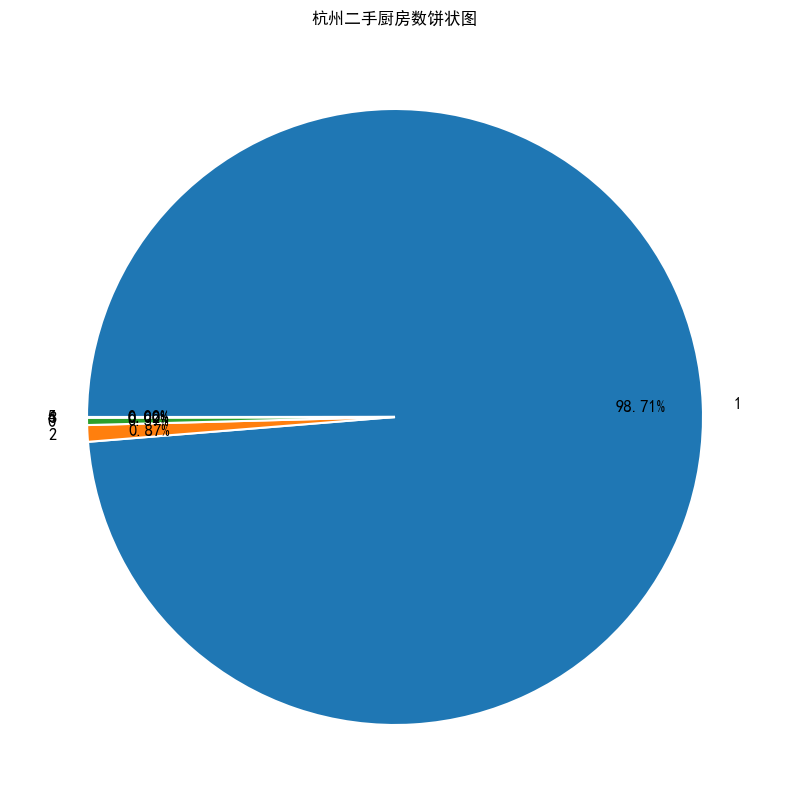

In [23]:
plt.figure(figsize=(12,10))
plt.title("杭州二手厨房数饼状图")
louceng2 = data['厨房数'].value_counts()
plt.pie(louceng2, labels = louceng2.index, autopct='%.2f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.1, # 设置教育水平标签与圆心的距离
        startangle = 180, # 设置饼图的初始角度
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'w'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'black'}, # 设置文本标签的属性值
       )
plt.show()

<h5>杭州二手卫生间数饼状图</h5>

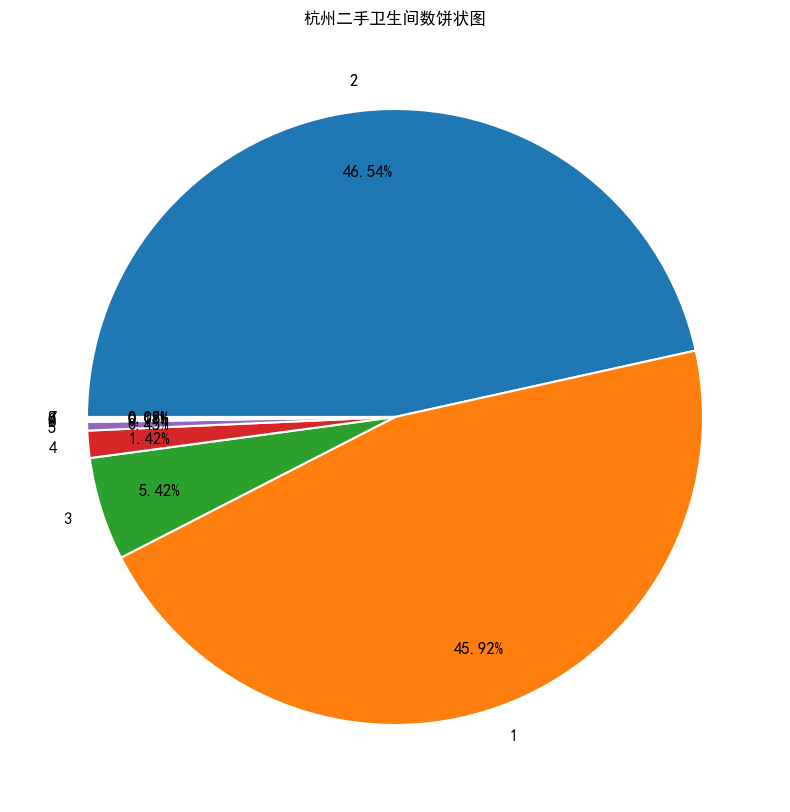

In [24]:
plt.figure(figsize=(12,10))
plt.title("杭州二手卫生间数饼状图")
louceng2 = data['卫生间数'].value_counts()
plt.pie(louceng2, labels = louceng2.index, autopct='%.2f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.1, # 设置教育水平标签与圆心的距离
        startangle = 180, # 设置饼图的初始角度
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'w'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'black'}, # 设置文本标签的属性值
       )
plt.show()

<h5>相关系数热力图</h5>

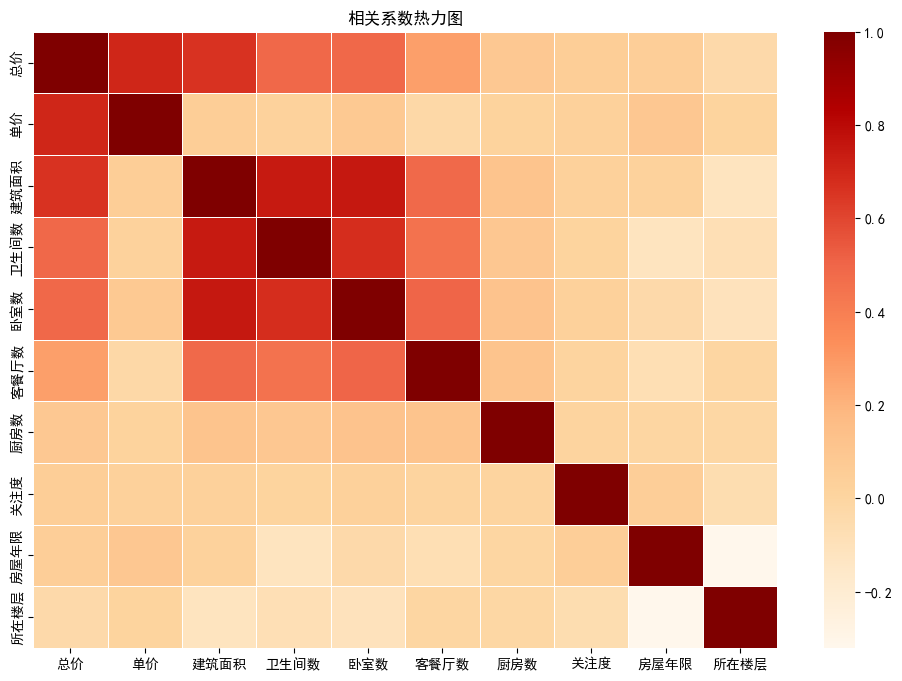

In [25]:
corrColName = list(data.dtypes[ data.dtypes != 'object' ].index)
corrDf = data[corrColName]
data_corr = corrDf.corr()
price_corr = dict(data_corr.iloc[0])
price_corr = sorted(price_corr.items(), key=lambda x: abs(x[1]), reverse=True)
price_corr_cols = [ r[0] for r in price_corr ]
price_data = data_corr[price_corr_cols].loc[price_corr_cols]
plt.figure(figsize=(12, 8))
plt.title("相关系数热力图")
ax = sns.heatmap(price_data, linewidths=0.5, cmap='OrRd', cbar=True)
plt.show()

In [26]:
print(price_corr)

[('总价', 1.0), ('单价', 0.7022176646867897), ('建筑面积', 0.6639179005294602), ('卫生间数', 0.494590255403247), ('卧室数', 0.494404243945475), ('客餐厅数', 0.27609599075013846), ('厨房数', 0.09205143362731164), ('关注度', 0.05578748336549071), ('房屋年限', 0.04939297935340283), ('所在楼层', -0.034799182272981684)]


### object类型数据处理

In [10]:
# 户型结构编码
def houseTypeStructure(s):
    if s == '平层':
        return 0
    elif s == '跃层':
        return 1
    elif s == '错层':
        return 2
    elif s == '复式':
        return 3
    elif s == 'Loft':
        return 4
# 建筑类型编码
def buildingType(s):
    if s == '板楼':
        return 0
    elif s == '板塔结合':
        return 1
    elif s == '塔楼':
        return 2
    elif s == '平房':
        return 3
#　建筑结构编码
def buildingStructure(s):
    if s == '钢混结构':
        return 0
    elif s == '砖混结构':
        return 1
    elif s == '混合结构':
        return 2
    elif s == '框架结构':
        return 3
    elif s == '钢结构':
        return 4
    elif s == '转木结构':
        return 5
# 装修情况编码
def decorateSituation(s):
    if s == '精装':
        return 0
    elif s == '简装':
        return 1
    elif s == '毛坯':
        return 2
    elif s == '其它':
        return 3
def elevator(s):
    if s == '无':
        return 0
    elif s == '有':
        return 1
# 房屋交易权属编码
def tranSactionOwnnership(s):
    if s == '商品房':
        return 0
    elif s == '已购公房':
        return 1
    elif s == '回迁房':
        return 2
    elif s == '私产':
        return 3
# 房屋用途编码
def usageOfHouse(s):
    if s == '普通住宅':
        return 0
    elif s == '商住两用':
        return 1
    elif s == '别墅':
        return 2
# 产权所属编码
def ownership(s):
    if s == '共有':
        return 0
    elif s == '非共有':
        return 1
# 城市编码
def city(s):
    if s == '拱墅':
        return 0
    elif s == '临平区':
        return 1
    elif s == '钱塘区':
        return 2
    elif s == '萧山':
        return 3
    elif s == '西湖':
        return 4
    elif s == '余杭':
        return 5
    elif s == '滨江':
        return 6
    elif s == '临安':
        return 7
    elif s == '上城':
        return 8
    elif s == '富阳':
        return 9

In [11]:
data['户型结构'] = data['户型结构'].apply(houseTypeStructure)
data['建筑类型'] = data['建筑类型'].apply(buildingType)
data['建筑结构'] = data['建筑结构'].apply(buildingStructure)
data['装修情况'] = data['装修情况'].apply(decorateSituation)
data['配备电梯'] = data['配备电梯'].apply(elevator)
data['交易权属'] = data['交易权属'].apply(tranSactionOwnnership)
data['房屋用途'] = data['房屋用途'].apply(usageOfHouse)
data['产权所属'] = data['产权所属'].apply(ownership)
data['城市'] = data['城市'].apply(city)

In [12]:
# 独热编码(哑变量处理)
def chaoxiang(df):
    chaoxiangColumns = ['南','南 北','东南','北','东','西','西南','东 南 北','东 南','东南 南','南 西 北','西北']
    if df['房屋朝向'] not in chaoxiangColumns:
        return "其他朝向"
    else:
        return df['房屋朝向']
data['房屋朝向'] = data.apply(lambda x:chaoxiang(x), axis=1)
one_hot_col_names = ['小区名称','房屋朝向']
data_onehot = pd.get_dummies(data[one_hot_col_names])
data = pd.concat([data,data_onehot],axis=1)

In [13]:
data

小区名称     总价     单价  关注度  所在楼层    建筑面积  户型结构  建筑类型 房屋朝向  建筑结构  装修情况  配备电梯  交易权属  房屋用途  房屋年限  产权所属  城市  卧室数  客餐厅数  厨房数  卫生间数  小区名称_O纪元  小区名称_一方大厦  小区名称_一清新村  小区名称_丁桥东兰轩  小区名称_丁桥兰苑  小区名称_丁桥大唐苑  小区名称_丁桥家苑  小区名称_丁桥景园北苑  小区名称_丁桥景园南苑  小区名称_丁桥颐景园  小区名称_丁衙巷  小区名称_丁香紫庭  小区名称_七古登市教委宿舍  小区名称_万乐园  小区名称_万乐西园  小区名称_万众名府  小区名称_万华茗楼  小区名称_万向城市花园  小区名称_万和国际  小区名称_万和玺园  小区名称_万塘路300号  小区名称_万安城市花园东苑  小区名称_万安城市花园南苑  小区名称_万安城市花园西苑  小区名称_万安景月湾  小区名称_万安秀水山庄  小区名称_万宝城  小区名称_万家星城一期  小区名称_万家星城三期  小区名称_万家星城二期  小区名称_万家花园万和苑  小区名称_万家花园家和苑  小区名称_万家花园欣和苑  小区名称_万家花城一期  小区名称_万家花城二期  小区名称_万星碧云天公寓  小区名称_万松岭路80号  小区名称_万泰华庭  小区名称_万泰城章  小区名称_万泰新语  小区名称_万盛商贸城公寓  小区名称_万科中央公园  小区名称_万科公园大道  小区名称_万科公望  小区名称_万科劝学里  小区名称_万科北宸之光一期  小区名称_万科北宸之光三期拱宸  小区名称_万科北宸之光二期  小区名称_万科名城博园  小区名称_万科君望  小区名称_万科坤和玉泉  小区名称_万科城市之光  小区名称_万科大家世纪之光  小区名称_万科大家九都会  小区名称_万科大家钱塘府  小区名称_万科大溪谷  小区名称_万科容大金色家园  小区名称_万科富春泉水湾  小区名称_万科星空  小区名称_万科智谷  小区名称_万科未来之光  小区名称_万科未来城三期梦溪里  小区名称_万科未来城二期  小区名称_万科杭宸一期  小区名称_万科杭宸二期  小区名称_万科桂语里  小区名称_万科海上明月  小区名称_万科溪望  \
0       欣盛东方郡西区  930.0  69053    4    18  134.68     0     1  南 北   0.0   0.0     1     0     0    13     0   6    3     2    1     2     False      False      False       False      False       False      False        False        False       False     False      False          False     False      False      False      False        False      False      False         False          False          False          False       False        False     False        False        False        False         False         False         False        False        False         False         False      False      False      False         False        False        False      False       False          False            False          False        False      False        False        False          False         False         False       False          False         False      False      False        False            False         False        False        False       False        False      False   
1        铂金时代公寓  765.0  55423    7    30  138.03     0     1  南 北   1.0   0.0     1     0     0    12     0   6    3     2    1     2     False      False      False       False      False       False      False        False        False       False     False      False          False     False      False      False      False        False      False      False         False          False          False          False       False        False     False        False        False        False         False         False         False        False        False         False         False      False      False      False         False        False        False      False       False          False            False          False        False      False        False        False          False         False         False       False          False         False      False      False        False            False         False        False        False       False        False      False   
2           星耀城  225.0  34611  104    20   65.01     0     1   西南   0.0   0.0     1     0     1     9     0   6    3     1    1     2     False      False      False       False      False       False      False        False        False       False     False      False          False     False      False      False      False        False      False      False         False          False          False          False       False        False     False        False        False        False         False         False         False        False        False         False         False      False      False      False         False        False        False      False       False          False            False          False        False      False        False        False          False         False         False       False          False         False      False      False        False            False         False        False        False       False        False      False   
3      

### 构建各小区平均关注度特征

In [14]:
average_attention_area = data.groupby('小区名称')['关注度'].mean().reset_index()
average_attention_area.columns = ['小区名称', '小区平均关注度']  # 重命名列以提高可读性
result = pd.merge(data, average_attention_area, on='小区名称', how='left')

### 构建各小区平均房价特征

In [15]:
average_price_area = data.groupby('小区名称')['单价'].mean().reset_index()
average_price_area.columns = ['小区名称', '小区平均房价']  # 重命名列以提高可读性
result = pd.merge(result, average_price_area, on='小区名称', how='left')

### 构建各城市平均房价

In [16]:
average_price_city = data.groupby('城市')['单价'].mean().reset_index()
average_price_city.columns = ['城市', '城市平均房价']  # 重命名列以提高可读性
result = pd.merge(result, average_price_city, on='城市', how='left')

In [17]:
result.drop(columns=['小区名称','房屋朝向','关注度'],inplace=True)

### 写入处理完的数据

In [161]:
result.to_csv('../data/deal/train_set.csv')
average_attention_area.to_csv('../data/deal/average_attention_area.csv')
average_price_area.to_csv('../data/deal/average_price_area.csv')
average_price_city.to_csv('../data/deal/average_price_city.csv')

In [18]:
result

总价     单价  所在楼层    建筑面积  户型结构  建筑类型  建筑结构  装修情况  配备电梯  交易权属  房屋用途  房屋年限  产权所属  城市  卧室数  客餐厅数  厨房数  卫生间数  小区名称_O纪元  小区名称_一方大厦  小区名称_一清新村  小区名称_丁桥东兰轩  小区名称_丁桥兰苑  小区名称_丁桥大唐苑  小区名称_丁桥家苑  小区名称_丁桥景园北苑  小区名称_丁桥景园南苑  小区名称_丁桥颐景园  小区名称_丁衙巷  小区名称_丁香紫庭  小区名称_七古登市教委宿舍  小区名称_万乐园  小区名称_万乐西园  小区名称_万众名府  小区名称_万华茗楼  小区名称_万向城市花园  小区名称_万和国际  小区名称_万和玺园  小区名称_万塘路300号  小区名称_万安城市花园东苑  小区名称_万安城市花园南苑  小区名称_万安城市花园西苑  小区名称_万安景月湾  小区名称_万安秀水山庄  小区名称_万宝城  小区名称_万家星城一期  小区名称_万家星城三期  小区名称_万家星城二期  小区名称_万家花园万和苑  小区名称_万家花园家和苑  小区名称_万家花园欣和苑  小区名称_万家花城一期  小区名称_万家花城二期  小区名称_万星碧云天公寓  小区名称_万松岭路80号  小区名称_万泰华庭  小区名称_万泰城章  小区名称_万泰新语  小区名称_万盛商贸城公寓  小区名称_万科中央公园  小区名称_万科公园大道  小区名称_万科公望  小区名称_万科劝学里  小区名称_万科北宸之光一期  小区名称_万科北宸之光三期拱宸  小区名称_万科北宸之光二期  小区名称_万科名城博园  小区名称_万科君望  小区名称_万科坤和玉泉  小区名称_万科城市之光  小区名称_万科大家世纪之光  小区名称_万科大家九都会  小区名称_万科大家钱塘府  小区名称_万科大溪谷  小区名称_万科容大金色家园  小区名称_万科富春泉水湾  小区名称_万科星空  小区名称_万科智谷  小区名称_万科未来之光  小区名称_万科未来城三期梦溪里  小区名称_万科未来城二期  小区名称_万科杭宸一期  小区名称_万科杭宸二期  小区名称_万科桂语里  小区名称_万科海上明月  小区名称_万科溪望  小区名称_万科玖望  \
0      930.0  69053    18  134.68     0     1   0.0   0.0     1     0     0    13     0   6    3     2    1     2     False      False      False       False      False       False      False        False        False       False     False      False          False     False      False      False      False        False      False      False         False          False          False          False       False        False     False        False        False        False         False         False         False        False        False         False         False      False      False      False         False        False        False      False       False          False            False          False        False      False        False        False          False         False         False       False          False         False      False      False        False            False         False        False        False       False        False      False      False   
1      765.0  55423    30  138.03     0     1   1.0   0.0     1     0     0    12     0   6    3     2    1     2     False      False      False       False      False       False      False        False        False       False     False      False          False     False      False      False      False        False      False      False         False          False          False          False       False        False     False        False        False        False         False         False         False        False        False         False         False      False      False      False         False        False        False      False       False          False            False          False        False      False        False        False          False         False         False       False          False         False      False      False        False            False         False        False        False       False        False      False      False   
2      225.0  34611    20   65.01     0     1   0.0   0.0     1     0     1     9     0   6    3     1    1     2     False      False      False       False      False       False      False        False        False       False     False      False          False     False      False      False      False        False      False      False         False          False          False          False       False        False     False        False        False        False         False         False         False        False        False         False         False      False      False      False         False        False        False      False       False          False            False          False        False      False        False        False          False         False         False       False          False         False      False      False        False            False         False        False        False       False        False      False      False   
3      148.0  31835    18   46.49     0   

In [22]:
data = pd.read_csv('../data/deal/data.csv',index_col=0)
data

,小区名称,所在楼层,建筑面积,户型结构,建筑类型,房屋朝向,建筑结构,装修情况,配备电梯,交易权属,房屋用途,房屋年限,产权所属,城市,卧室数,客餐厅数,厨房数,卫生间数
0,欣盛东方郡西区,18,134.68,平层,板塔结合,南 北,钢混结构,精装,有,商品房,普通住宅,13,共有,滨江,3,2,1,2
1,铂金时代公寓,30,138.03,平层,板塔结合,南 北,砖混结构,精装,有,商品房,普通住宅,12,共有,滨江,3,2,1,2
2,星耀城,20,65.01,平层,板塔结合,西南,钢混结构,精装,有,商品房,商住两用,9,共有,滨江,3,1,1,2
3,中赢康康谷,18,46.49,平层,板楼,南,钢混结构,精装,有,商品房,商住两用,6,共有,滨江,2,2,1,2
4,玲珑府,21,49.13,平层,板塔结合,南,钢混结构,精装,有,商品房,商住两用,6,非共有,滨江,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29022,良渚文化村七贤郡,9,88.21,平层,板楼,南 北,钢混结构,精装,有,商品房,普通住宅,9,非共有,余杭,3,2,1,1
29023,西城时代家园,11,91.96,平层,板楼,南,钢混结构,简装,有,商品房,普通住宅,7,非共有,余杭,3,2,1,1
29024,众安学君里,24,89.78,平层,板塔结合,南 北,钢混结构,简装,有,商品房,普通住宅,5,共有,余杭,3,2,1,1
29025,北秀蓝湾花苑,11,126.93,平层,板楼,南 北,钢混结构,精装,有,商品房,普通住宅,8,共有,余杭,3,2,1,2


In [23]:
# 定义一个函数来决定对每列执行的操作
def agg_function(series):
    if series.dtype == 'object':
        # 如果是对象类型，返回众数
        return series.mode().iloc[0] if not series.mode().empty else None
    else:
        # 如果是数值类型，返回平均值
        return series.mean()

# 按照'小区名'分组，并应用agg_function
result = data.groupby('小区名称').agg(agg_function)

print(result)

              所在楼层        建筑面积 户型结构  建筑类型 房屋朝向  建筑结构 装修情况 配备电梯 交易权属  房屋用途       房屋年限 产权所属  城市       卧室数      客餐厅数       厨房数      卫生间数
小区名称                                                                                                                                 
O纪元      28.000000   38.760000   平层  板塔结合   东北  框架结构   精装    有  商品房  商住两用   3.000000   共有  萧山  1.000000  1.000000  1.000000  1.000000
一方大厦     16.000000   40.280000   平层    板楼    东  钢混结构   简装    有  商品房  商住两用  11.000000  非共有  萧山  1.000000  0.666667  1.000000  1.000000
一清新村      6.666667   85.150000   平层    塔楼    南  混合结构   简装    无  商品房  普通住宅  16.833333   共有  拱墅  2.666667  1.333333  1.000000  1.166667
丁桥东兰轩    16.000000  138.380000   平层    板楼    南  钢混结构   毛坯    有  商品房  普通住宅   6.000000   共有  上城  3.000000  1.000000  1.000000  2.000000
丁桥兰苑     11.962963   96.121481   平层    板楼    南  钢混结构   精装    有  商品房  普通住宅   8.296296   共有  上城  2.592593  1.592593  1.000000  1.000000
...            ...         ...  ...   ...  ...   ...  ...  ...

In [24]:
result

,所在楼层,建筑面积,户型结构,建筑类型,房屋朝向,建筑结构,装修情况,配备电梯,交易权属,房屋用途,房屋年限,产权所属,城市,卧室数,客餐厅数,厨房数,卫生间数
小区名称,,,,,,,,,,,,,,,,,
O纪元,28.000000,38.760000,平层,板塔结合,东北,框架结构,精装,有,商品房,商住两用,3.000000,共有,萧山,1.000000,1.000000,1.000000,1.000000
一方大厦,16.000000,40.280000,平层,板楼,东,钢混结构,简装,有,商品房,商住两用,11.000000,非共有,萧山,1.000000,0.666667,1.000000,1.000000
一清新村,6.666667,85.150000,平层,塔楼,南,混合结构,简装,无,商品房,普通住宅,16.833333,共有,拱墅,2.666667,1.333333,1.000000,1.166667
丁桥东兰轩,16.000000,138.380000,平层,板楼,南,钢混结构,毛坯,有,商品房,普通住宅,6.000000,共有,上城,3.000000,1.000000,1.000000,2.000000
丁桥兰苑,11.962963,96.121481,平层,板楼,南,钢混结构,精装,有,商品房,普通住宅,8.296296,共有,上城,2.592593,1.592593,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
龙禧boss港,25.000000,60.628000,平层,塔楼,南,钢混结构,精装,有,商品房,商住两用,9.900000,共有,滨江,1.000000,0.950000,1.000000,1.000000
龙禧大酒店,28.000000,89.721333,平层,板楼,南,钢混结构,精装,有,商品房,普通住宅,7.866667,共有,滨江,1.666667,1.266667,0.933333,1.133333
龙翔•秋月苑,11.000000,138.920000,平层,塔楼,南,框架结构,精装,有,商品房,普通住宅,16.000000,非共有,富阳,3.000000,2.000000,1.000000,2.000000
